## Classification Model

### 1. Adult Dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

In [2]:
# #Read the original dataset into a pandas dataframe
df = adult.data.original

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
categorical = [var for var in df.columns if df[var].dtype != 'int'] # to get the categorical data

# to show the different unique entries for each column
for column in df[categorical]:
    unique_vals = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_vals}\n")

Column: workclass
Unique values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Column: education
Unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Column: marital-status
Unique values: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Column: occupation
Unique values: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

Column: relationship
Unique values: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Column: race
Unique values: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Ot

#### 1.1 Data Cleaning

In [6]:
# replacing the '?' into NA
df.replace('?', pd.NA, inplace = True)

# drop rows with missing values
df.dropna(inplace = True)

# drop relationship column since we already have the marital-status column
df = df.drop('relationship', axis = 1)

# drop education-num column since we already have education column
df = df.drop('education-num', axis = 1)

# remove the punctuation in the income columns
df['income'] = df['income'].str.replace('.', '', regex = False)

# replacing workclass categories
df['workclass'] = df['workclass'].replace({
    
    'State-gov' : 'Government', 
    'Federal-gov' : 'Government', 
    'Local-gov' : 'Government',

    'Self-emp-not-inc' : 'Self-Employed',
    'Self-emp-inc' : 'Self-Employed',

    'Private' : 'Private', # Private refers to private sectors, which can remain as it is

    'Without-pay' : 'Unemployed', # we assume that without-pay and never-worked are classified as 'Unemployed' since both groups received no pay
    'Never-worked' : 'Unemployed' 
 })

 # replacing education categories
df['education'] = df['education'].replace({

    'Preschool' : 'School',
    '1st-4th' : 'School',
    '5th-6th' : 'School',
    '7th-8th' : 'School',

    '9th' : 'High-School',
    '10th' : 'High-School',
    '11th' : 'High-School',
    '12th' : 'High-School',
    'HS-grad' : 'High-School',

    'Assoc-acdm' : 'Associate',
    'Assoc-voc' : 'Associate',
    'Some-college' : 'Associate',

    'Bachelors' : 'Bachelors',

    'Masters' : 'Postgraduate',
    'Doctorate' : 'Postgraduate',
    'Prof-school' : 'Postgraduate'
})

# replace marital status categories
df['marital-status'] = df['marital-status'].replace({

    'Married-civ-spouse': 'Married', 
    'Married-AF-spouse': 'Married',

    'Divorced': 'Not Married', 
    'Separated': 'Not Married', 
    'Married-spouse-absent': 'Not Married',
    'Never-married' : 'Not Married',
    'Widowed' : 'Not Married'
})

# replace occupation categories
df['occupation'] = df['occupation'].replace({

    'Adm-clerical': 'White-collar',
    'Tech-support': 'White-collar',
    'Exec-managerial': 'White-collar',
    'Prof-specialty': 'White-collar',

    'Handlers-cleaners': 'Blue-collar',
    'Craft-repair': 'Blue-collar',
    'Transport-moving': 'Blue-collar',
    'Farming-fishing': 'Blue-collar',
    'Machine-op-inspct': 'Blue-collar',

    'Sales': 'Service',
    'Other-service': 'Service',
    'Protective-serv': 'Service',
    'Armed-Forces': 'Service',
    'Priv-house-serv': 'Service'
})

# replace native countries categories into continents
df['native-country'] = df['native-country'].replace({

    'United-States': 'North America',
    'Cuba':'North America',
    'Jamaica' : 'North America',
    'Mexico' : 'North America',
    'Puerto-Rico' : 'North America',
    'Honduras' : 'North America',
    'Haiti' : 'North America',
    'Dominican-Republic': 'North America',
    'El-Salvador' : 'North America',
    'Guatemala' : 'North America',
    'Outlying-US(Guam-USVI-etc)' : 'North America',
    'Nicaragua' : 'North America',

    'South' : 'South America',
    'Canada' : 'South America',
    'Columbia' : 'South America',
    'Ecuador' : 'South America',
    'Peru' : 'South America',
    'Trinadad&Tobago' : 'South America',

    'England' : 'Europe',
    'Germany' : 'Europe',
    'Italy' : 'Europe',
    'Poland' :'Europe',
    'Portugal' : 'Europe',
    'France' : 'Europe',
    'Yugoslavia' : 'Europe',
    'Scotland' : 'Europe',
    'Greece' : 'Europe',
    'Ireland' : 'Europe',
    'Hungary' : 'Europe',
    'Holand-Netherlands': 'Europe',

    'India' :'Asia',
    'Iran' : 'Asia',
    'Philippines' : 'Asia',
    'Cambodia' : 'Asia',
    'Thailand' : 'Asia',
    'Laos' : 'Asia',
    'Taiwan' : 'Asia',
    'China' : 'Asia',
    'Japan' : 'Asia',
    'Vietnam' : 'Asia',
    'Hong' : 'Asia'
})

In [7]:
df.info() # to check if there are still any null values in the new dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   race            45222 non-null  object
 7   sex             45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
 11  native-country  45222 non-null  object
 12  income          45222 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.8+ MB


In [8]:
categorical = [var for var in df.columns if df[var].dtype != 'int'] # to get the categorical data

# to show the different unique entries for each column
for column in df[categorical]:
    unique_vals = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_vals}\n")

Column: workclass
Unique values: ['Government' 'Self-Employed' 'Private' 'Unemployed']

Column: education
Unique values: ['Bachelors' 'High-School' 'Postgraduate' 'Associate' 'School']

Column: marital-status
Unique values: ['Not Married' 'Married']

Column: occupation
Unique values: ['White-collar' 'Blue-collar' 'Service']

Column: race
Unique values: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Column: sex
Unique values: ['Male' 'Female']

Column: native-country
Unique values: ['North America' 'Asia' 'Europe' 'South America']

Column: income
Unique values: ['<=50K' '>50K']



### 2. How does the use of Label Encoding for Naives Bayes Classifier and One-Hot Encoding for Logistic Regression affect the performance of the models in predicting income levels from categorical features?

- There are two popular encoding: Label Encoding and One-Hot Encoding. We want to test if the different encoding techniques will cause any significant difference in the prediction.

- The encoding methods are being chosen base on their appropriateness for each model's underlying assumptions and characteristics. We would like to compare if the encoding method affects the model's ability to predict income levels accurately.

#### 2.1 Difference between Label Encoding and One-Hot Encoding

- Label Encoding converts categorical data into numbers so that the model can process it. For example,

| workclass | Encoded Value |
| :-: | :-:  |
| Government | 0 |
| Private| 1 |
| Self-Employed | 2 |
| Unemployed | 3 |

- One-Hot Encoding, unlike Label Encoding, represents each category as a separate binary columns. For example,

| Government | Private | Self - Employed | Unemployed | 
| :-: | :-: | :-: | :-: |
| 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 0 | 0 | 1 |

#### 2.2 Naive Bayes Classifier

The foundation of Naive Bayes Classifier comes from the famous probability concept, Bayes Theorem. Bayes Theorem states that $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

**1. Posterior Probability $P(A|B)$**

- In binary classification, we are predicting posterior probability $P(Y = 1| X_{1} = x_{1}, X_{2} = x_{2}, ... , X_{k} = x_{k})$. 

- However, it is extremely tedious to find the conditional probability with so many given conditions. Hence, we calculate using the likelihood instead.

**2. Likelihood $P(B|A)$**

- Likelihood in Naive Bayes Classifier is given by : $P(X_{1} = x_{1}, X_{2} = x_{2}, ... , X_{k} = x_{k}| Y = 1)$

- The likelihood itself is also hard to compute. To simplify the computation, we assume $X_{1}, X_{2}, ... , X_{k}$ are conditionally independent to $Y$, hence the term "Naive". This means the likelihood can be now rewritten as: $P(X_{1} = x_{1}| Y = 1) \cdot P(X_{2} = x_{2}| Y = 1)\cdot...\cdot P(X_{k} = x_{k}| Y = 1)$, which is computationally more efficient. Similarly for $Y = 0$ cases.

**3. Prior Probability $P(A)$**

- Prior probability $P(Y = 1)$ is computed as the proportion of instances where $Y = 1$ in the dataset, without observing any predictors/features. Similarly for $P(Y = 0)$

**4. Prior Predictor Probability $P(B)$**

- By Law of Total Probability and the conditonal independence given $Y$ assumption as explained in the Likelihood section,

- $P(X_{1} = x_{1},X_{2} = x_{2} ... , X_{k} = x_{k}) = P(X_{1} = x_{1}| Y = 1)\cdot...\cdot P(X_{k} = x_{k}| Y = 1)\cdot P(Y = 1) + P(X_{1} = x_{1}| Y = 0)\cdot...\cdot P(X_{k} = x_{k}| Y = 0) \cdot P(Y = 0)$

**5. Prediction**

- Following the Bayes Theorem, we can then find the posterior probability we are interested to predict. Generally, the threshold is 0.5, which means:

- $P(Y = 1|X_{1} = x_{1}, X_{2} = x_{2}, ... , X_{k} = x_{k}) \ge 0.5$, we classify/predict that specific data point as $Y = 1$

##### 2.2.1 Label Encoding 

In this example, we will be using categorical predictors. First, we have to convert categorical data into numbers so that the model can process it. For Naive Bayes Classifier, we will use Label Encoding over One-Hot Encoding.

**Issue with One-Hot Encoding in Naive Bayes**

Consider a categorical feature like 'workclass', if we apply One-Hot Encoding, the workclass will be split into separate binary columns as shown earlier. 

Now the posterior probability we interested to calculate in Naive Bayes is:

$P(income \ge 50K | Government = 0, Private = 0, Self-Employed = 0, Unemployed = 1, ...)$. 

The corresponding likelihood term is: 

$P(Government = 0, Private = 0, Self-Employed = 0, Unemployed = 1, ...| income \ge 50K)$. 

However, the "workclass" categories are mutually exclusive and collectively exhaustive (i.e. one person cannot belong to multiple categories at once), which is an extreme case of dependence. This leads to incorrect prediction because the model assumes conditional independence when they are actually highly dependent.

Therefore, Label Encoding is preferred as it doesn't introduce the dependency problem in Naive Bayes model.

In [9]:
# We will be working with only categorical features
df_cat = df[categorical].copy()

# Initialise LabelEncoder
le = LabelEncoder()
for col in df_cat.columns:
    df_cat[col] = le.fit_transform(df_cat[col])

    # Display the category mapping for each column
    print(f"\nMapping for '{col}':")
    for category, code in zip(le.classes_, range(len(le.classes_))):
        print(f"{category} -> {code}")


Mapping for 'workclass':
Government -> 0
Private -> 1
Self-Employed -> 2
Unemployed -> 3

Mapping for 'education':
Associate -> 0
Bachelors -> 1
High-School -> 2
Postgraduate -> 3
School -> 4

Mapping for 'marital-status':
Married -> 0
Not Married -> 1

Mapping for 'occupation':
Blue-collar -> 0
Service -> 1
White-collar -> 2

Mapping for 'race':
Amer-Indian-Eskimo -> 0
Asian-Pac-Islander -> 1
Black -> 2
Other -> 3
White -> 4

Mapping for 'sex':
Female -> 0
Male -> 1

Mapping for 'native-country':
Asia -> 0
Europe -> 1
North America -> 2
South America -> 3

Mapping for 'income':
<=50K -> 0
>50K -> 1


##### 2.2.2 Applying the Naive Bayes Classifier Model

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      6745
           1       0.66      0.51      0.58      2300

    accuracy                           0.81      9045
   macro avg       0.75      0.71      0.73      9045
weighted avg       0.80      0.81      0.80      9045



Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

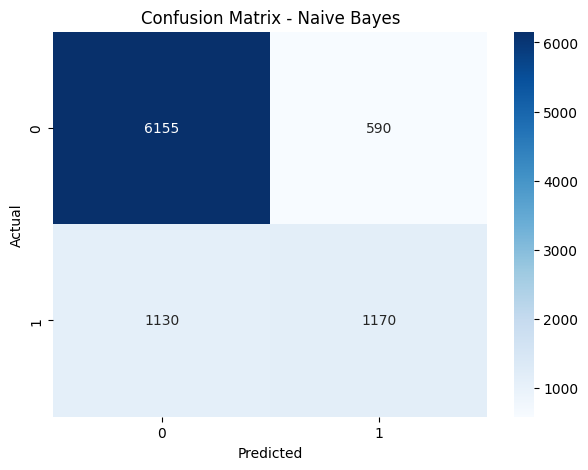

In [10]:
X = df_cat.drop(columns = ['income']) # features
y = df_cat['income']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# For Naive Bayes Classification
model_NB = CategoricalNB()
model_NB.fit(X_train, y_train)

y_pred_NB = model_NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred_NB))


cm = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True, fmt= 'd', cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')

#### 2.2.3 Oversampling

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      6830
           1       0.77      0.75      0.76      6776

    accuracy                           0.76     13606
   macro avg       0.76      0.76      0.76     13606
weighted avg       0.76      0.76      0.76     13606



Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

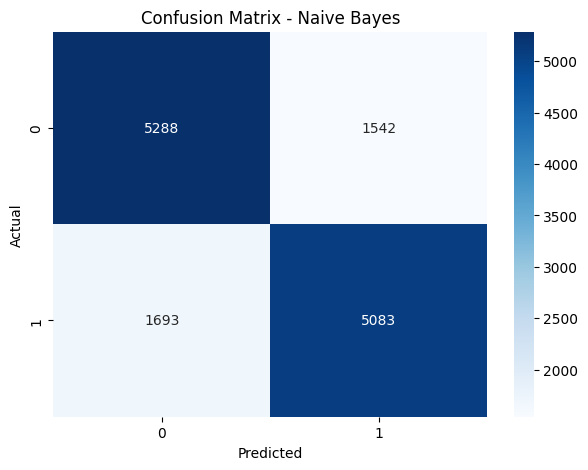

In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)

X_resampled, y_resampled = ros.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.2, random_state = 42)

# For Naive Bayes Classification
model_NB = CategoricalNB()
model_NB.fit(X_train, y_train)

y_pred_NB = model_NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred_NB))


cm = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True, fmt= 'd', cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')

#### 2.3 Logistic Regression

The Logistic Regression classify the rows using the log - odds (function): 

$ln(\frac{p}{1-p}) = \beta_0 + \beta_1X_1+ \beta_2X_2 + ... + \beta_nX_n$

By rearranging the logistic regression equation and making $p$ the subject, we will get the ***Sigmoid function***, which has a range of 0 to 1, suitable for binary classification. An illustration of Sigmoid Function:

 <img src = 'https://miro.medium.com/v2/resize:fit:485/1*aQPjVStYupSRGtIsjq3adA.png' >

Generally, if $\phi(z) \geq 0.5$, then logistic regression will classify that row into the positive class '1'. Otherwise, the logistic regression will classify that row to class '0'.

##### 2.3.1 One-Hot Encoding

Similarly, we are using the categorical predictors in this example. For Logistic Regression, we will use One-Hot Encoding over Label Encoding.

**Issue with Label Encoding with Logistic Regression**

Consider the categorical feature "workclass", if we apply Label Encoding, we are assigning the numerical values as explained earlier. 

However, Logistic Regression treats these numbers as ordered values, which means the model may incorrectly assume:

"Unemployed" (3) > "Employed" (2) > "Private" (1) > "Government" (0), which doesn't make sense as there is no inherent order for "workclass".

**Dummy Variable Trap**

Dummy variable trap occurs when one of the dummy variable can be predicted from the other variables, leading to perfect multicollinearity. This typically happens after applying One-Hot Encoding.

For example, consider the 'workclass' feature, after One-Hot Encoding, an unemployed person would represented as: Government = 0, Private = 0, Employed = 0, Unemployed = 1. 

Since the first 3 categories are all 0, we can already infer that Unemployed column must be 1. This introduces perfect multicollinearity, which can lead to inaccurate statistical inference. Therefore, for each encoded feature, we must drop one category to prevent dummy variable trap.

In [13]:
# We will be working with only categorical features
df_cat = df[categorical].copy()

X = df_cat.drop(columns = ['income'])
y = df_cat['income'] # to make y into 0s and 1s

# One-Hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first = True)

# Change True/False into 0s and 1s
X_encoded = X_encoded.astype(int)

X_encoded.head()

,workclass_Private,workclass_Self-Employed,workclass_Unemployed,education_Bachelors,education_High-School,education_Postgraduate,education_School,marital-status_Not Married,occupation_Service,occupation_White-collar,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Europe,native-country_North America,native-country_South America
0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0
1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0


##### 2.3.2 Applying the Logistic Regression Model

Accuracy: 0.82

Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      6745
        >50K       0.71      0.47      0.57      2300

    accuracy                           0.82      9045
   macro avg       0.77      0.70      0.72      9045
weighted avg       0.81      0.82      0.80      9045



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

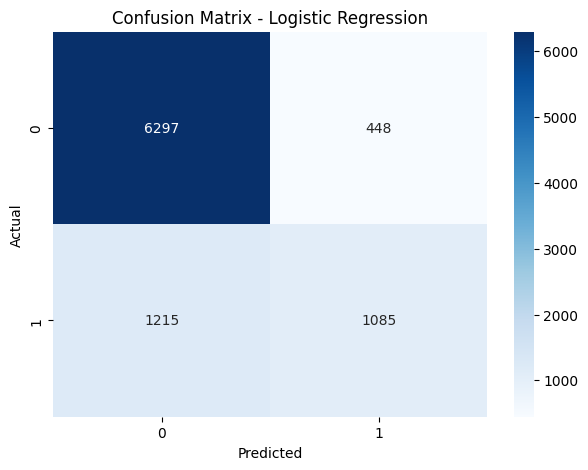

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, test_size = 0.2, random_state = 42)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report: \n', classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True, fmt= 'd', cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

#### 2.3.3 OverSampling

Accuracy: 0.77

Classification Report: 
               precision    recall  f1-score   support

       <=50K       0.83      0.69      0.75      6830
        >50K       0.73      0.86      0.79      6776

    accuracy                           0.77     13606
   macro avg       0.78      0.77      0.77     13606
weighted avg       0.78      0.77      0.77     13606



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

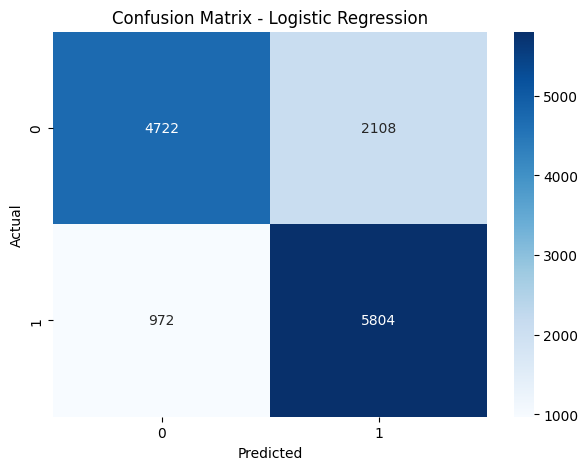

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = ros.fit_resample(X_encoded,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.2, random_state = 42)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report: \n', classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True, fmt= 'd', cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

#### 2.4 Comparison and Conclusion

- Based on the Confusion Matrix and the accuracy score, we can conclude that Label Encoding and One-Hot Encoding doesn't significantly affect the modelling results.

- However, choosing the appropriate encoding method depends on the model being used. Selecting the right encoding technique ensure the model processes categorical data correctly, leading to accurate and reliable results.

- Even so, we still face an issue where both models are better at predicting '<50K' class than predicting '>50K' class. This is because the dataset is imbalanced, with '<50K' being the majority class. This imbalance causes both models to be biased towards the majority class, leading to lower recall rate for the '>50K' class. (Recall Rate is the proportion of the actual instances of a class that are classified correctly). Hence, we consider to oversample to solve the class imbalance issue.

### 3. How does Oversampling changed the modelling results?

After oversampling, (looking at Section 2.2.3 and 2.3.3)

for Naive Bayes Classifier, the accuracy has dropped from 0.81 to 0.76 and 
for Logistic Regression, the accuracy has dropped from 0.82 to 0.77.

for Naive Bayes Classifier, the recall rate for the minority class '>50K' has increased from 0.51 to 0.75,
for Logistic Regression, the recall rate for the minority class '<50K' has increased from 0.47 to 0.86.

A trade-off exists as both models now prioritise correctly classifying both classes rather than favouring the '<=50K' class after oversampling. While accuracy decrease slightly, we greatly improve the recall rate for the minority class. Generally, in the real-world context, we are more interested in identifying the minority class as these cases typically represent the problem that requires more attention.